# 1. Import libraries

In [113]:
#standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#EDA
from matplotlib.ticker import MaxNLocator
import math

# 2. Plot colors and settings

In [5]:
#plot colors: [grey, blue, orange, green, pink, brown, purple, yellow, red]
light = ['#8c8c8c', '#88bde6', '#fbb258', '#90cd97', '#f6aac8', '#bfa454', '#bc99c7', '#eddd46', '#f07d6e']
medium = ['#4d4d4d', '#5da6da', '#faa43a', '#60bd68', '#f17cb1', '#b2912f', '#b276b2', '#dece3f', '#f15954']
dark_bright = ['#000000', '#265dab', '#df5c24', '#059749', '#e5126d', '#9d732a', '#7a3a96', '#c7b52e', '#cb2026']

#grid/rule lines: light grey
grid = ['#e0e0e0']

#plot parameters
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

# 3. Load data

In [6]:
#CSVs from data_cleaning.py
df_1 = pd.read_csv('data_cleaning/df_title_loc_comp_salary.csv')
df_2 = pd.read_csv('data_cleaning/df_qualifications.csv')
df_3 = pd.read_csv('data_cleaning/df_benefits.csv')

In [7]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1287 non-null   int64  
 1   Title       1287 non-null   object 
 2   Company     1285 non-null   object 
 3   Location    1116 non-null   object 
 4   Salary      1209 non-null   float64
 5   Levels      1287 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 60.5+ KB


In [8]:
df_1.head()

,Unnamed: 0,Title,Company,Location,Salary,Levels
0,0,Data Scientist,Numerdox,"Sacramento, CA",110000.0,Jr.
1,1,Data Analyst,Cepheid,"Lodi, CA",120000.0,Unknown
2,2,Data Scientist,Cepheid,"Sunnyvale, CA",150000.0,Staff
3,3,Data Scientist,Verana Health,"San Francisco, CA",150000.0,Unknown
4,4,Data Scientist,Tinder,"San Francisco, CA",130000.0,Jr.


In [9]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Columns: 363 entries, Unnamed: 0 to Editing
dtypes: float64(362), int64(1)
memory usage: 3.6 MB


In [10]:
df_2.head()

,Unnamed: 0,Analysis skills,Communication skills,Research,R,Machine learning,Bachelor's degree,Master's degree,Doctoral degree,Doctor of Philosophy,...,Spectroscopy,SoC,GLP,CGMP,Bootstrap,Lending,Grant writing,Pass polygraph test,Pivot tables,Editing
0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 53 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           1287 non-null   int64  
 1   Health insurance                     558 non-null    float64
 2   Paid time off                        558 non-null    float64
 3   Commuter assistance                  558 non-null    float64
 4   Employee stock purchase plan         558 non-null    float64
 5   401(k) matching                      558 non-null    float64
 6   401(k)                               558 non-null    float64
 7   Dental insurance                     558 non-null    float64
 8   Employee assistance program          558 non-null    float64
 9   Unlimited paid time off              558 non-null    float64
 10  Work from home                       558 non-null    float64
 11  Flexible schedule             

In [12]:
df_3.head()

,Unnamed: 0,Health insurance,Paid time off,Commuter assistance,Employee stock purchase plan,401(k) matching,401(k),Dental insurance,Employee assistance program,Unlimited paid time off,...,Cell phone reimbursement,On-site gym,Bereavement leave,Relocation assistance,Family leave,Free parking,Meals & incidentals stipend,Employee stock ownership plan,Free massages,Green card sponsorship
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 4. Data cleaning

In [13]:
df_1 = df_1.drop('Unnamed: 0', axis=1)
df_2 = df_2.drop('Unnamed: 0', axis=1)
df_3 = df_3.drop('Unnamed: 0', axis=1)

In [14]:
for i in df_2.columns:
    df_2.loc[:,i] = df_2.loc[:,i].astype('Int64')
    
for i in df_3.columns:
    df_3.loc[:,i] = df_3.loc[:,i].astype('Int64')

# 5. EDA

In [15]:
pd.pivot_table(df_1, 'Salary', index=['Title'], columns=['Levels'])

Levels,Distinguished,Jr.,Lead,Principal,Sr.,Staff,Unknown
Title,,,,,,,
Applied Scientist,NaN,NaN,NaN,130000.000000,157142.857143,156666.666667,146666.666667
Data Analyst,NaN,82666.666667,150000.000000,96000.000000,132699.250000,130000.000000,95044.444444
Data Architect,190000.0,NaN,NaN,NaN,170000.000000,NaN,200000.000000
Data Engineer,NaN,NaN,NaN,NaN,139310.344828,NaN,133846.153846
Data Science Manager,NaN,NaN,NaN,NaN,NaN,NaN,160365.079365
Data Scientist,NaN,126736.000000,169545.454545,179760.000000,165748.325359,151021.000000,131012.383333
Director of Data Science,NaN,NaN,NaN,NaN,NaN,NaN,231909.090909
Head of Data Science,NaN,NaN,NaN,NaN,NaN,NaN,175000.000000
Machine Learning Engineer,NaN,154000.000000,172000.000000,200000.000000,176176.121951,167500.000000,143733.333333


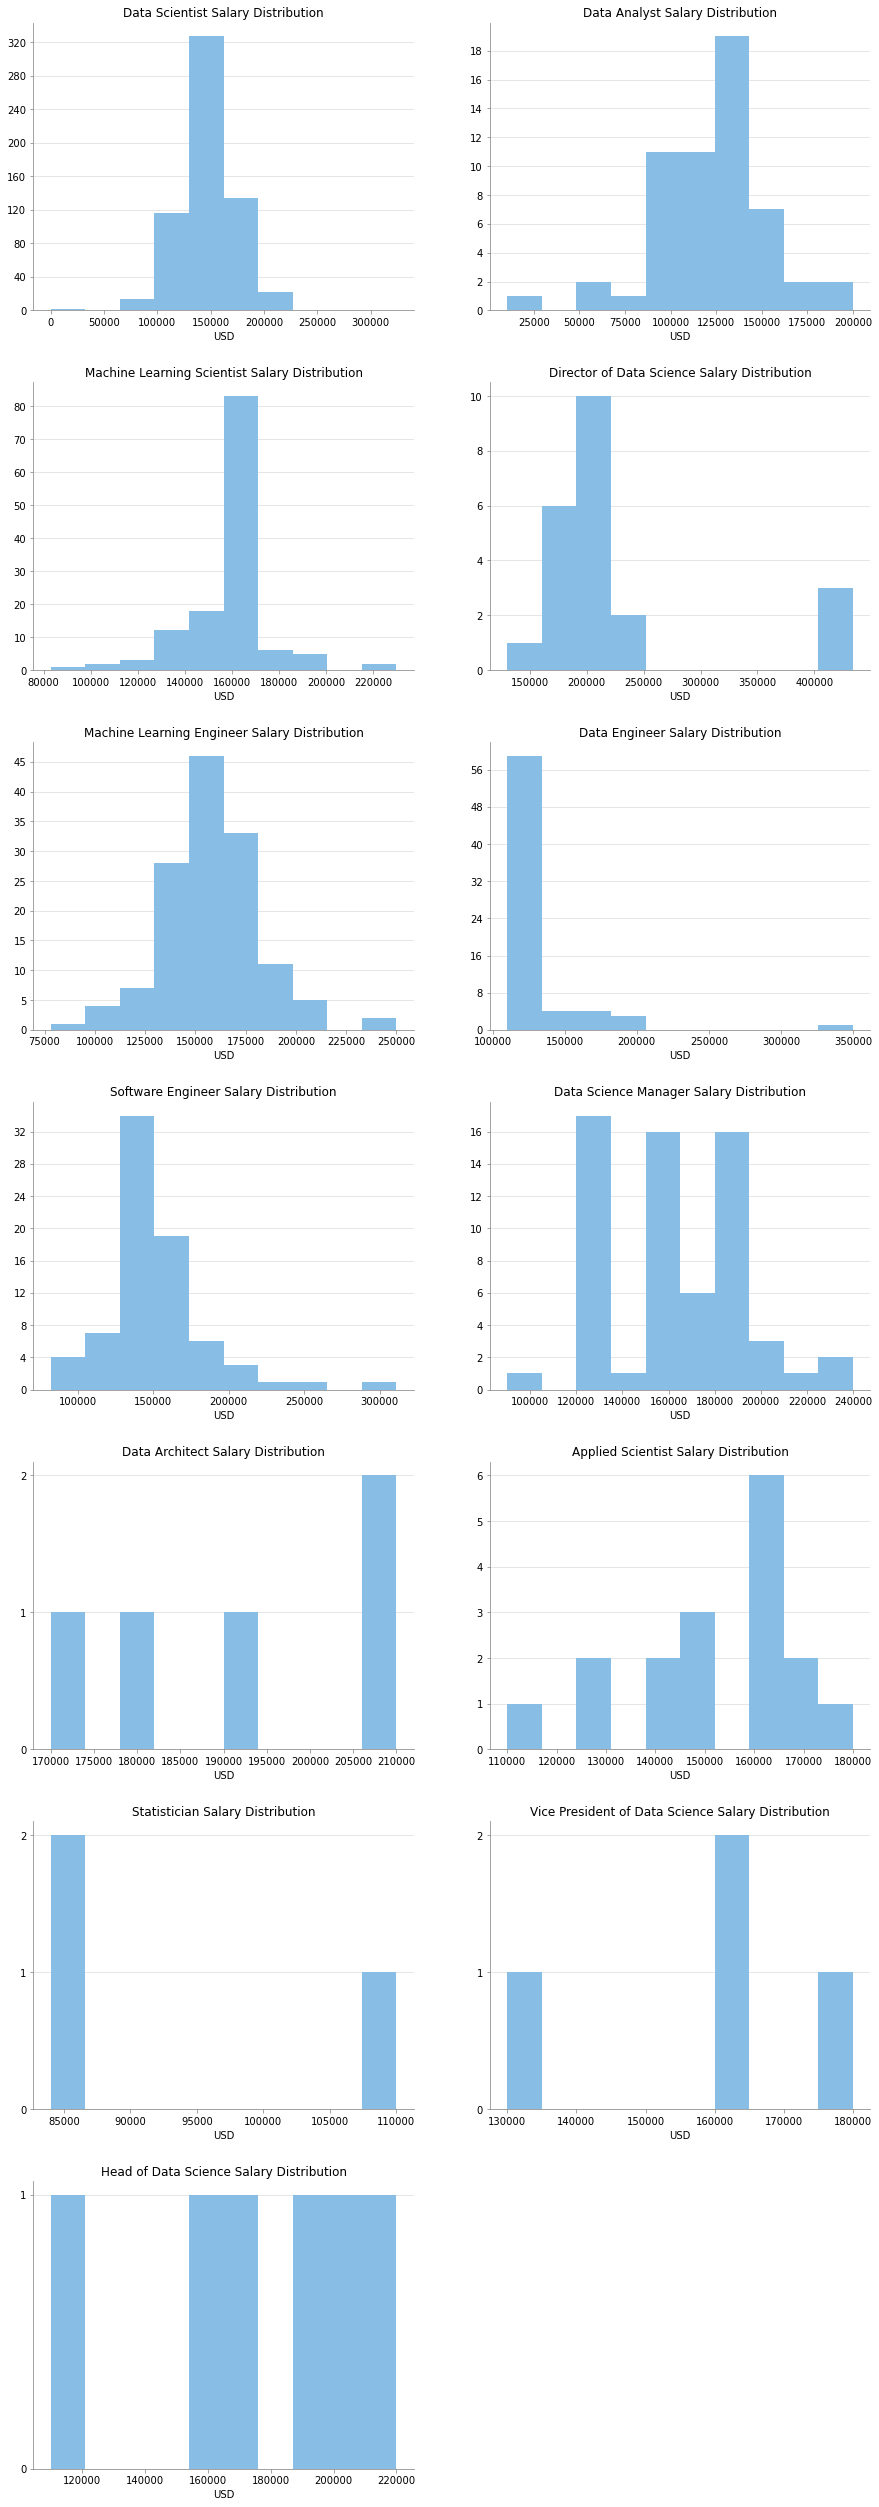

In [16]:
fig, ax = plt.subplots(7,2, figsize=(15,45))
plt.subplots_adjust(hspace = .25)

for i in range(len(df_1.Title.unique())):
    
    job_title = df_1.Title.unique()[i]
    ax[math.floor(i/2), i%2].hist(df_1[df_1.Title == job_title]['Salary'], color = light[1])
    ax[math.floor(i/2), i%2].set_title('{} Salary Distribution'.format(job_title))
    ax[math.floor(i/2), i%2].set_xlabel('USD')
    ax[math.floor(i/2), i%2].spines["bottom"].set_color(light[0])
    ax[math.floor(i/2), i%2].spines["left"].set_color(light[0])
    ax[math.floor(i/2), i%2].xaxis.label.set_color(dark_bright[0])
    ax[math.floor(i/2), i%2].yaxis.label.set_color(dark_bright[0])
    ax[math.floor(i/2), i%2].title.set_color(dark_bright[0])
    ax[math.floor(i/2), i%2].tick_params(axis ='x', colors = light[0], labelcolor=dark_bright[0])
    ax[math.floor(i/2), i%2].tick_params(axis='y', colors = light[0], labelcolor=dark_bright[0])
    ax[math.floor(i/2), i%2].yaxis.set_major_locator(MaxNLocator(integer=True))
#     ax[math.floor(i/2), i%2].set_xlim([0,500000])
#     ax[math.floor(i/2), i%2].set_ylim([0,350])
    ax[math.floor(i/2), i%2].grid(color = grid[0], axis='y')
    ax[math.floor(i/2), i%2].set_axisbelow(True)
    

    
fig.delaxes(ax[6][1])

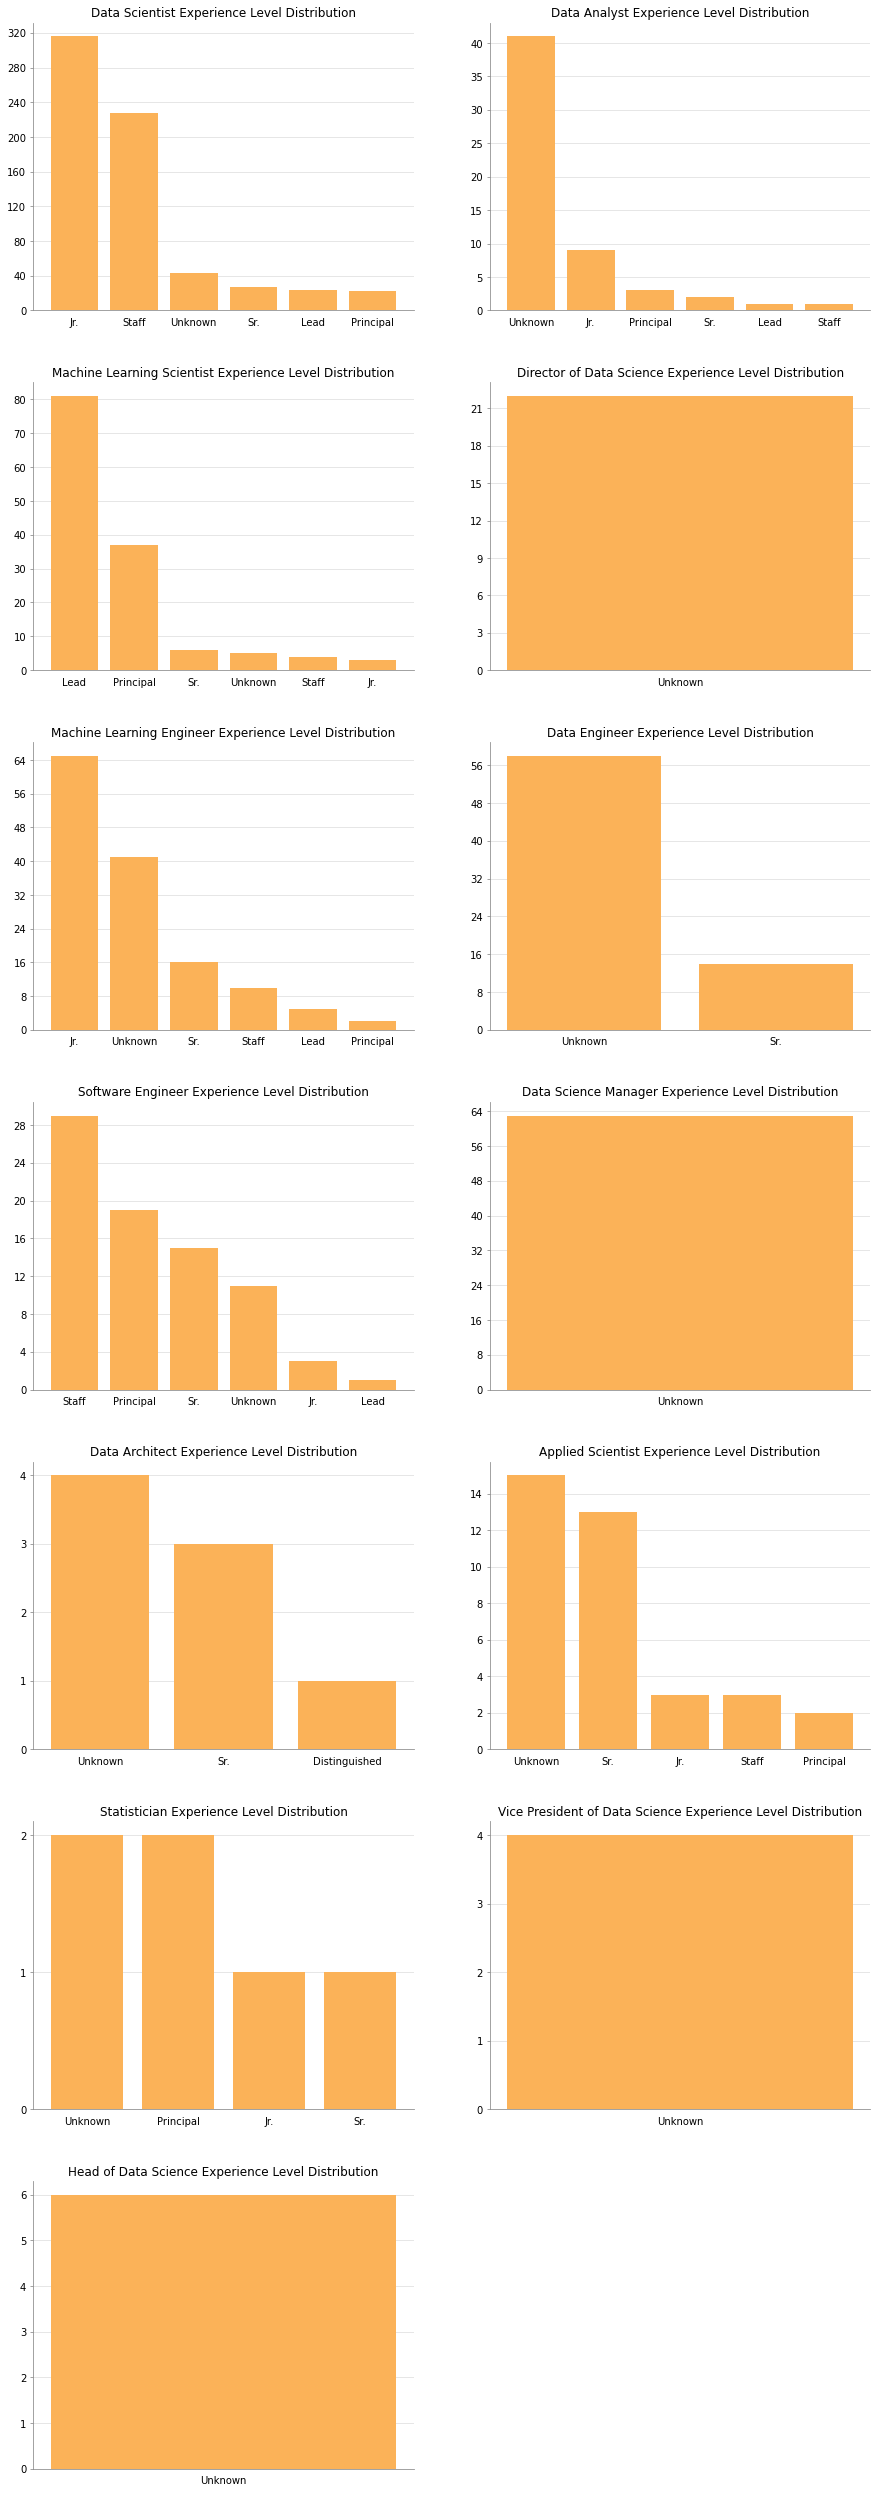

In [17]:
fig, ax = plt.subplots(7,2, figsize=(15,45))
plt.subplots_adjust(hspace = .25)


for i in range(len(df_1.Title.unique())):
    
    job_title = df_1.Title.unique()[i]
    ax[math.floor(i/2), i%2].bar(x = df_1[df_1.Title == job_title]['Levels'].unique(),
                                 height = df_1[df_1.Title == job_title]['Levels'].value_counts().values,
                                 color = light[2])
    ax[math.floor(i/2), i%2].set_title('{} Experience Level Distribution'.format(job_title))
    ax[math.floor(i/2), i%2].spines["bottom"].set_color(light[0])
    ax[math.floor(i/2), i%2].spines["left"].set_color(light[0])
    ax[math.floor(i/2), i%2].xaxis.label.set_color(dark_bright[0])
    ax[math.floor(i/2), i%2].yaxis.label.set_color(dark_bright[0])
    ax[math.floor(i/2), i%2].title.set_color(dark_bright[0])
    ax[math.floor(i/2), i%2].tick_params(axis ='x', colors = light[0], labelcolor=dark_bright[0])
    ax[math.floor(i/2), i%2].tick_params(axis='y', colors = light[0], labelcolor=dark_bright[0])
    ax[math.floor(i/2), i%2].xaxis.set_ticks_position('none')
    ax[math.floor(i/2), i%2].yaxis.set_major_locator(MaxNLocator(integer=True))
    ax[math.floor(i/2), i%2].grid(color = grid[0], axis='y')
    ax[math.floor(i/2), i%2].set_axisbelow(True)
    
    
fig.delaxes(ax[6][1])

In [18]:
sorted_index_descent = df_1.groupby(['Title']).median().sort_values(by= 'Salary',ascending=False).index

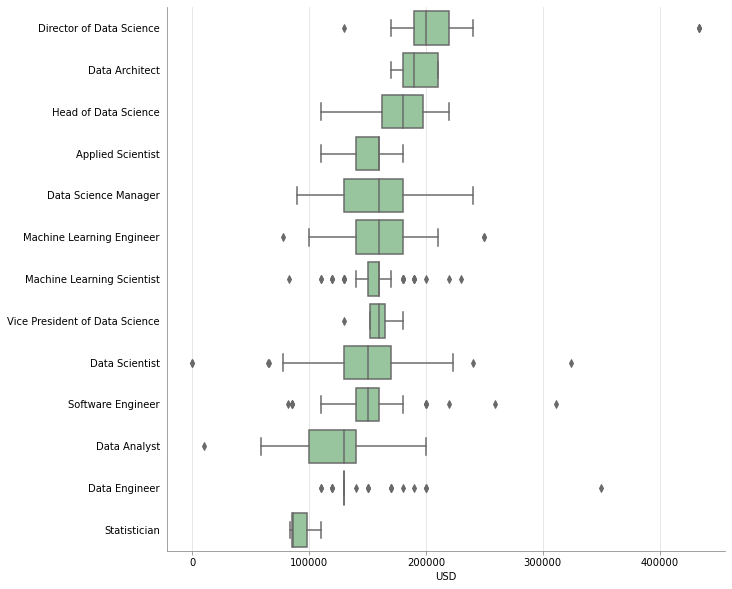

In [19]:
plt.figure(figsize=(10, 10))
ax = sns.boxplot(y = df_1['Title'], x = df_1['Salary'], order = sorted_index_descent, color = light[3])
ax.set_ylabel('')
ax.set_xlabel('USD')

ax.spines["bottom"].set_color(light[0])
ax.spines["left"].set_color(light[0])
ax.xaxis.label.set_color(dark_bright[0])
ax.yaxis.label.set_color(dark_bright[0])
ax.title.set_color(dark_bright[0])
ax.tick_params(axis='x', colors = light[0], labelcolor=dark_bright[0])
ax.tick_params(axis='y', colors = light[0], labelcolor=dark_bright[0])
ax.yaxis.set_ticks_position('none')
ax.grid(color = grid[0], axis='x')
ax.set_axisbelow(True)

plt.show()

In [20]:
sorted_index_descent = df_1.groupby(['Levels']).median().sort_values(by= 'Salary',ascending=False).index

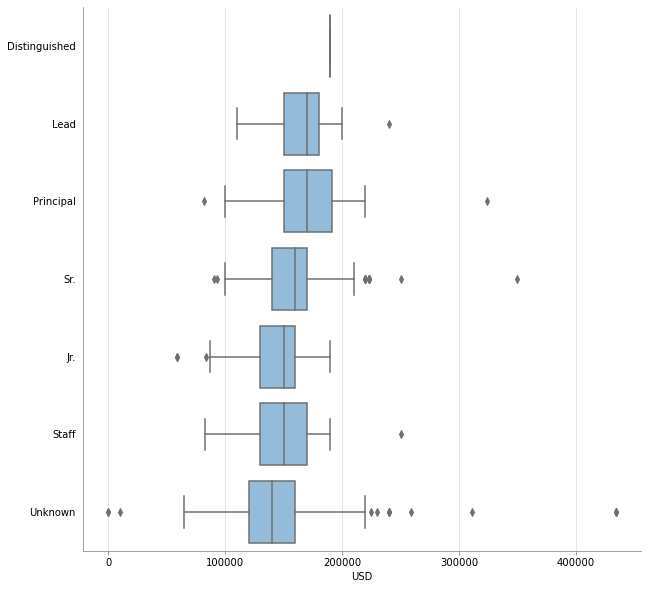

In [21]:
plt.figure(figsize=(10, 10))
ax = sns.boxplot(y=df_1['Levels'], x=df_1['Salary'], order=sorted_index_descent, color = light[1])
ax.set_ylabel('')
ax.set_xlabel('USD')

ax.spines["bottom"].set_color(light[0])
ax.spines["left"].set_color(light[0])
ax.xaxis.label.set_color(dark_bright[0])
ax.yaxis.label.set_color(dark_bright[0])
ax.title.set_color(dark_bright[0])
ax.tick_params(axis='x', colors = light[0], labelcolor=dark_bright[0])
ax.tick_params(axis='y', colors = light[0], labelcolor=dark_bright[0])
ax.yaxis.set_ticks_position('none')
ax.grid(color = grid[0], axis='x')
ax.set_axisbelow(True)

plt.show()

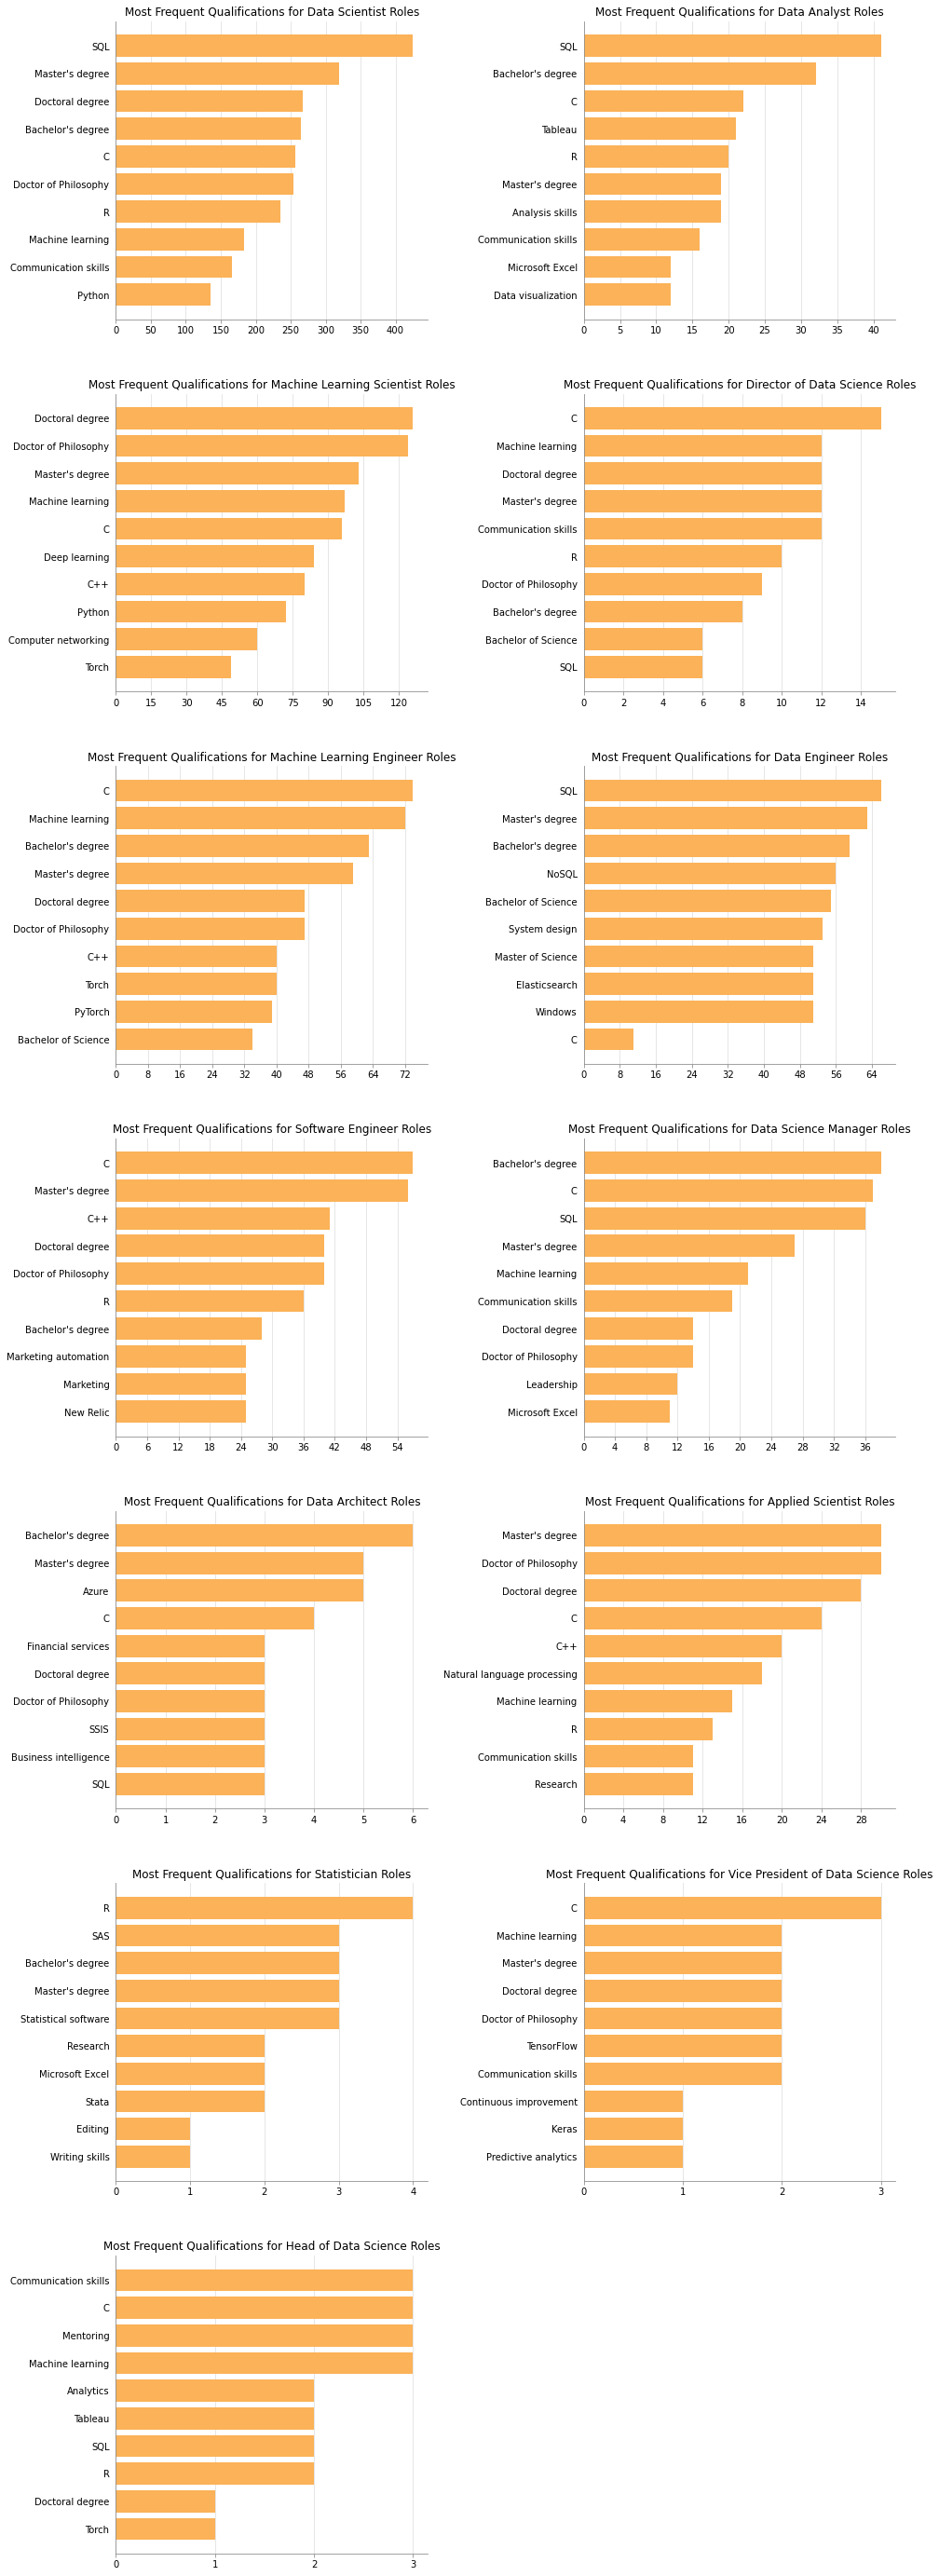

In [22]:
fig, ax = plt.subplots(7,2, figsize=(15,50))
plt.subplots_adjust(hspace = 0.25, wspace = 0.5)

for i in range(len(df_1.Title.unique())):
    
    job_title = df_1.Title.unique()[i]
    qual_index = np.flip(df_2.loc[df_1[df_1.Title == job_title].index, :].sum(axis=0).sort_values(ascending=False).index[0:10])
    qual_counts = np.flip(df_2.loc[df_1[df_1.Title == job_title].index, :].sum(axis=0).sort_values(ascending=False).values[0:10])
    
    ax[math.floor(i/2), i%2].barh(width = qual_counts,
                                 y = qual_index,
                                 color = light[2])
    ax[math.floor(i/2), i%2].set_title('Most Frequent Qualifications for {} Roles'.format(job_title))
    
    ax[math.floor(i/2), i%2].spines["bottom"].set_color(light[0])
    ax[math.floor(i/2), i%2].spines["left"].set_color(light[0])
    ax[math.floor(i/2), i%2].xaxis.label.set_color(dark_bright[0])
    ax[math.floor(i/2), i%2].yaxis.label.set_color(dark_bright[0])
    ax[math.floor(i/2), i%2].title.set_color(dark_bright[0])
    ax[math.floor(i/2), i%2].tick_params(axis ='x', colors = light[0], labelcolor=dark_bright[0])
    ax[math.floor(i/2), i%2].tick_params(axis='y', colors = light[0], labelcolor=dark_bright[0])
    ax[math.floor(i/2), i%2].yaxis.set_ticks_position('none')
    ax[math.floor(i/2), i%2].xaxis.set_major_locator(MaxNLocator(integer=True))
    ax[math.floor(i/2), i%2].grid(color = grid[0], axis='x')
    ax[math.floor(i/2), i%2].set_axisbelow(True)
    
    
fig.delaxes(ax[6][1])

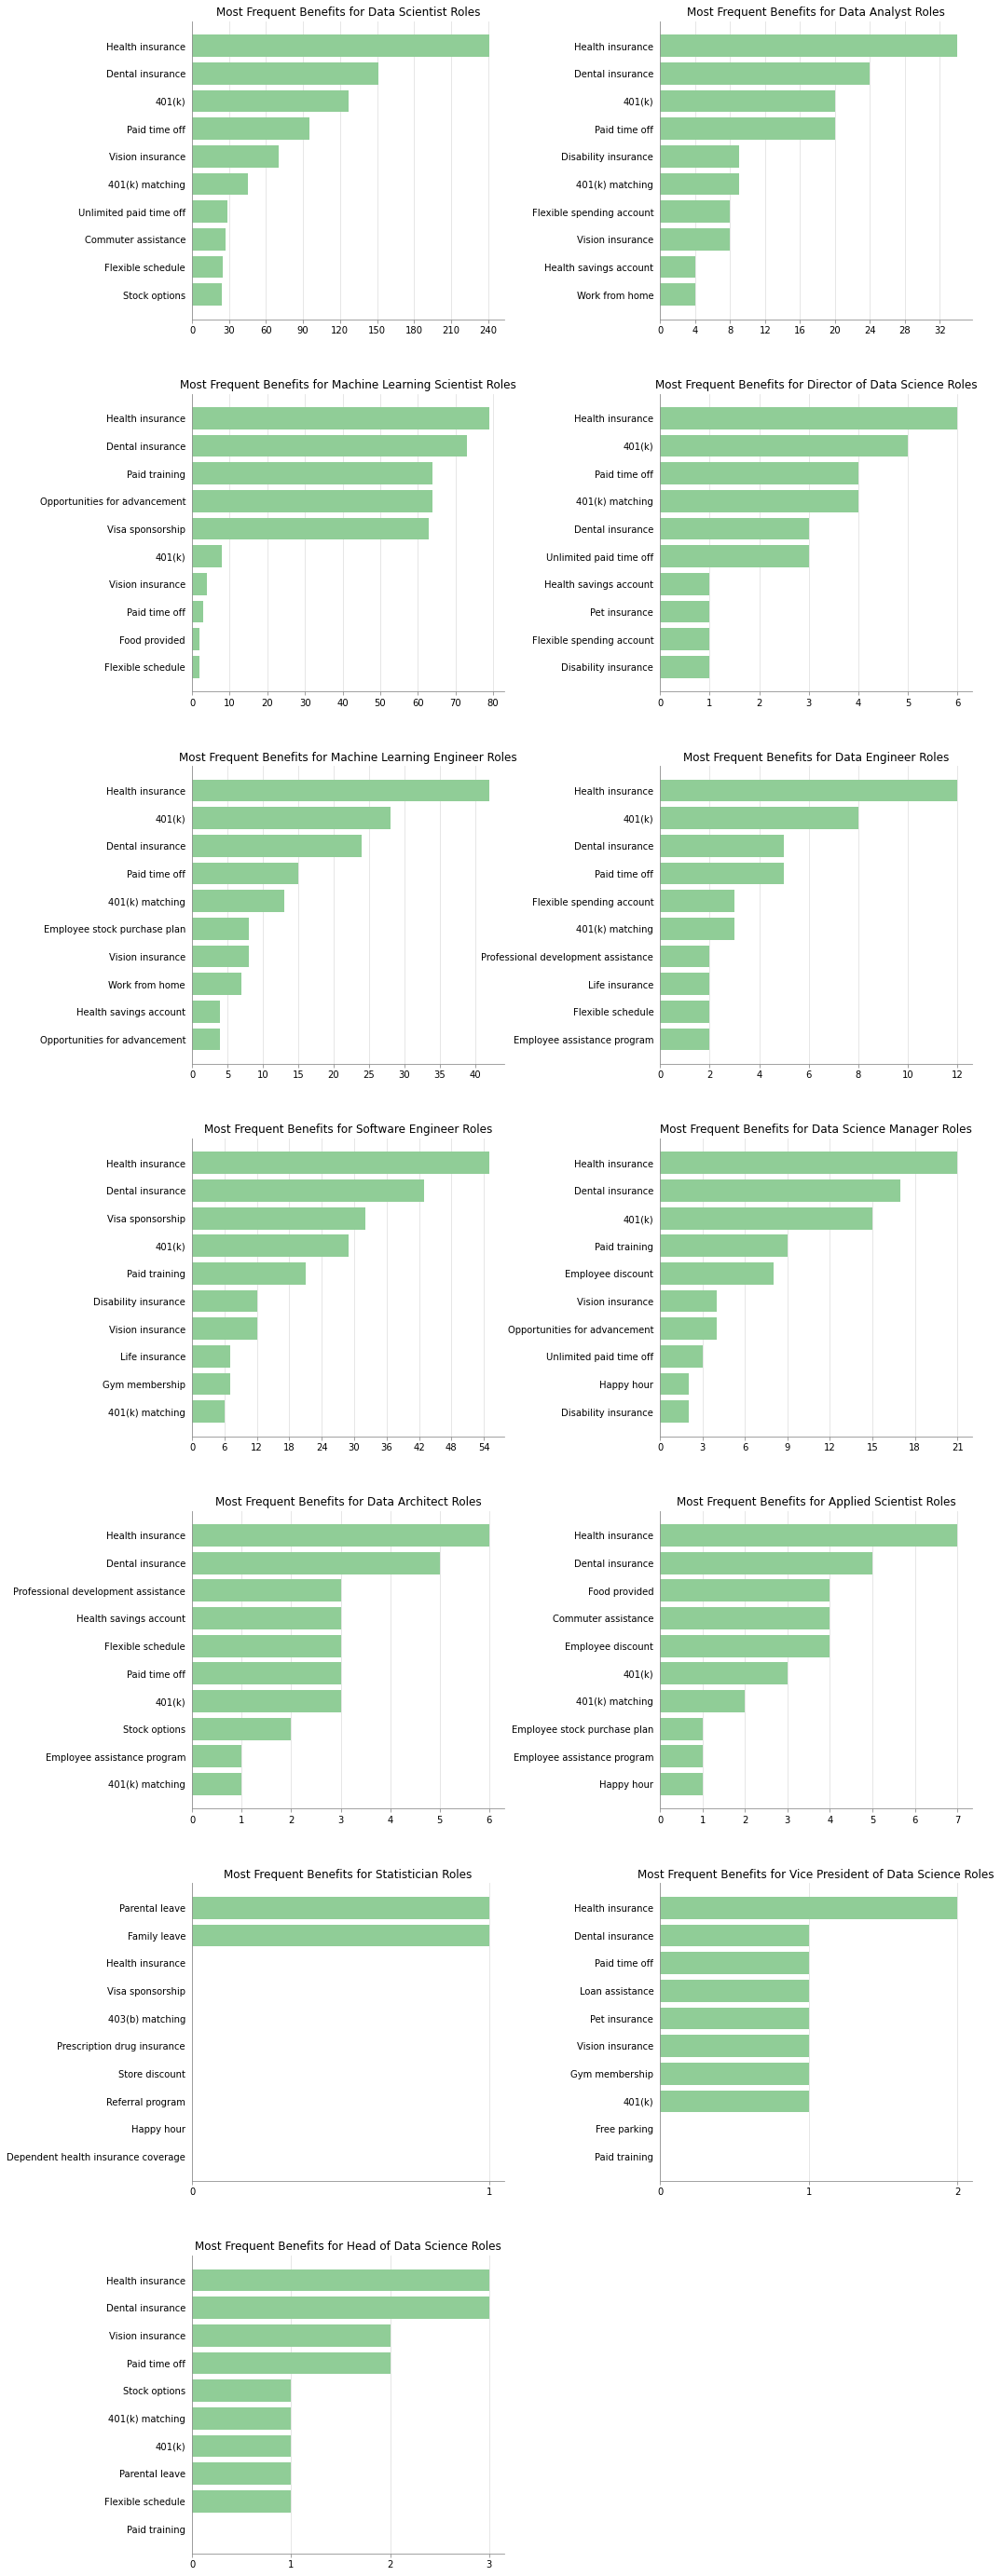

In [23]:
fig, ax = plt.subplots(7,2, figsize=(15,50))
plt.subplots_adjust(hspace = 0.25, wspace = 0.5)

for i in range(len(df_1.Title.unique())):
    
    job_title = df_1.Title.unique()[i]
    qual_index = np.flip(df_3.loc[df_1[df_1.Title == job_title].index, :].sum(axis=0).sort_values(ascending=False).index[0:10])
    qual_counts = np.flip(df_3.loc[df_1[df_1.Title == job_title].index, :].sum(axis=0).sort_values(ascending=False).values[0:10])
    
    ax[math.floor(i/2), i%2].barh(width = qual_counts,
                                 y = qual_index,
                                 color = light[3])
    ax[math.floor(i/2), i%2].set_title('Most Frequent Benefits for {} Roles'.format(job_title))
    
    ax[math.floor(i/2), i%2].spines["bottom"].set_color(light[0])
    ax[math.floor(i/2), i%2].spines["left"].set_color(light[0])
    ax[math.floor(i/2), i%2].xaxis.label.set_color(dark_bright[0])
    ax[math.floor(i/2), i%2].yaxis.label.set_color(dark_bright[0])
    ax[math.floor(i/2), i%2].title.set_color(dark_bright[0])
    ax[math.floor(i/2), i%2].tick_params(axis ='x', colors = light[0], labelcolor=dark_bright[0])
    ax[math.floor(i/2), i%2].tick_params(axis='y', colors = light[0], labelcolor=dark_bright[0])
    ax[math.floor(i/2), i%2].yaxis.set_ticks_position('none')
    ax[math.floor(i/2), i%2].xaxis.set_major_locator(MaxNLocator(integer=True))
    ax[math.floor(i/2), i%2].grid(color = grid[0], axis='x')
    ax[math.floor(i/2), i%2].set_axisbelow(True)
    
    
fig.delaxes(ax[6][1])


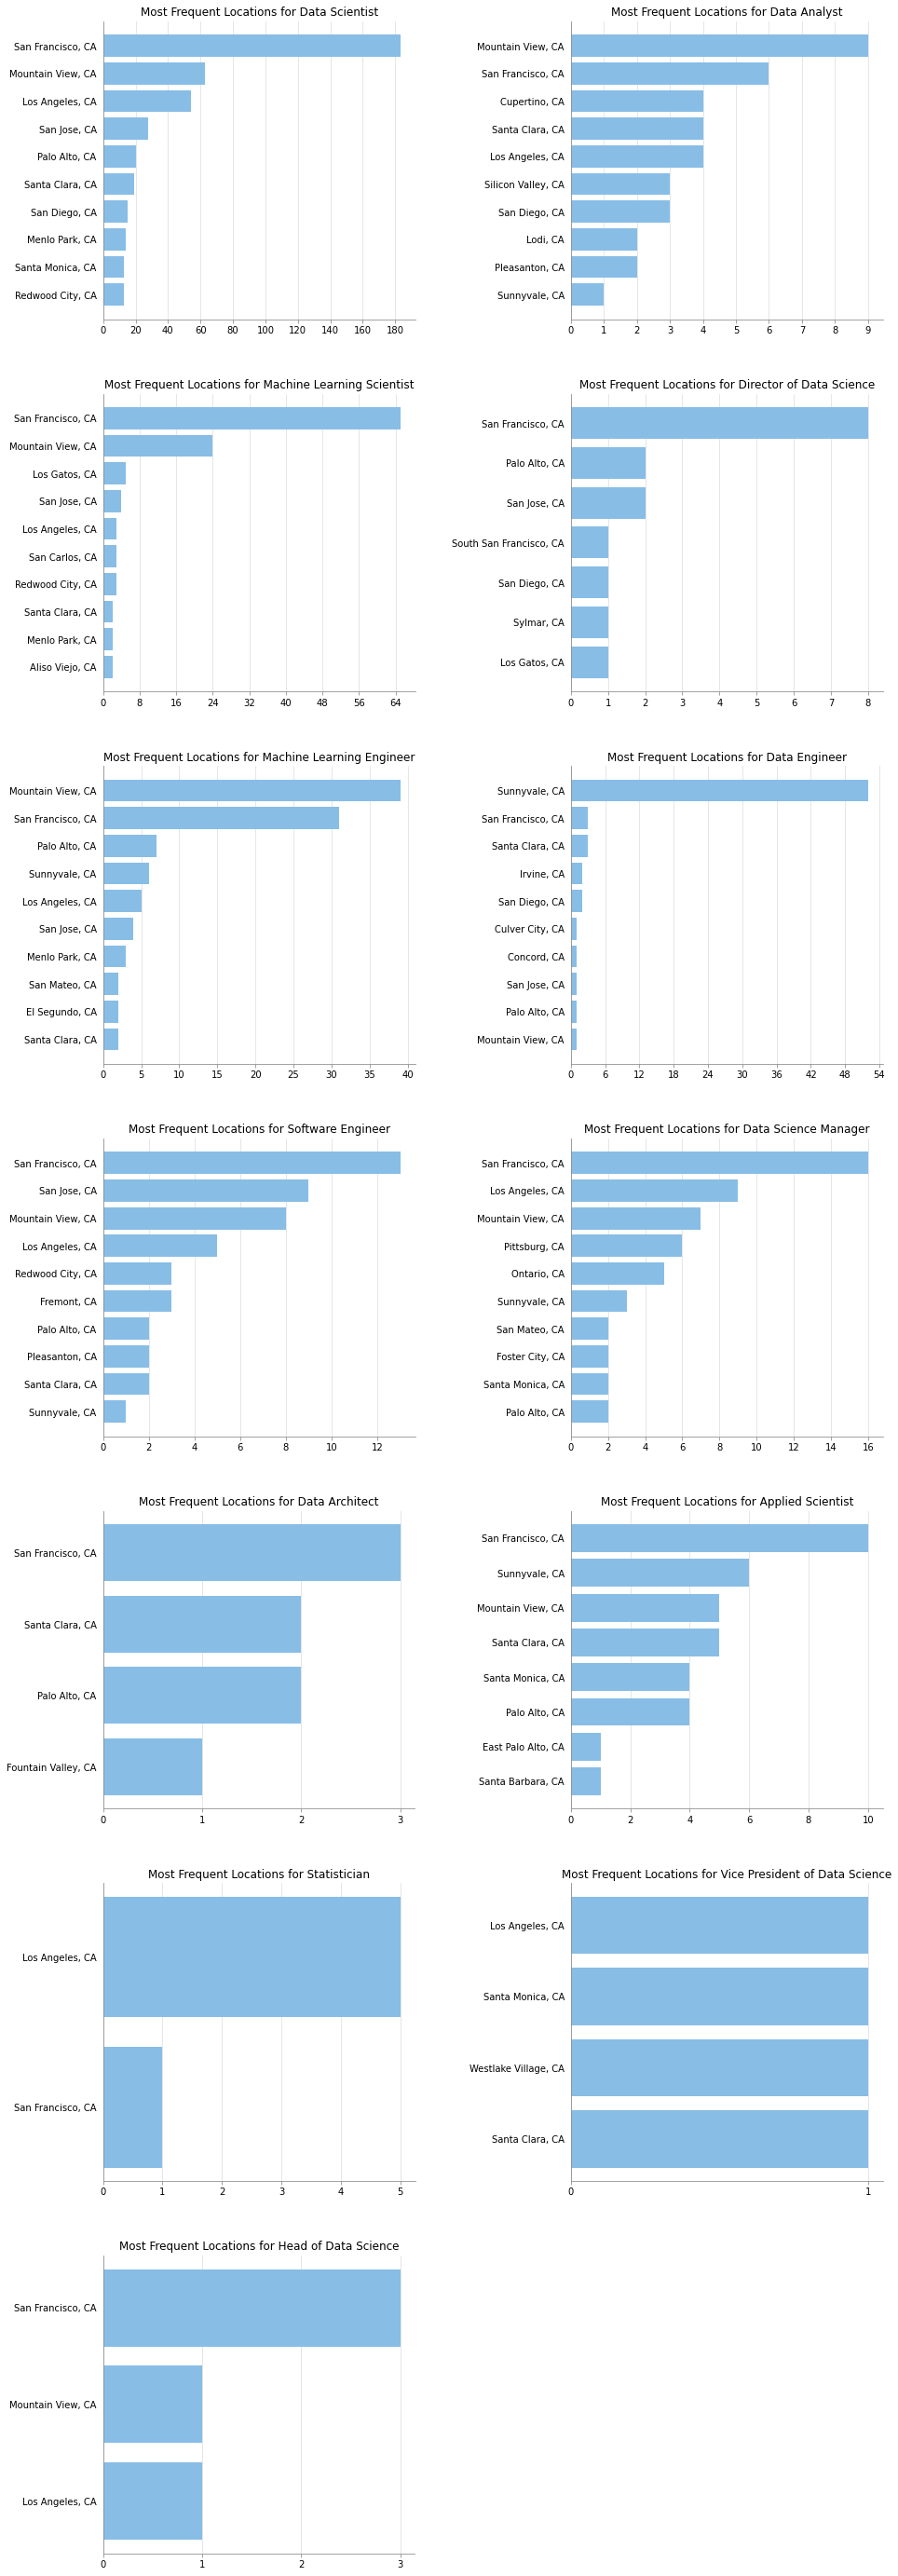

In [24]:
fig, ax = plt.subplots(7,2, figsize=(15,50))
plt.subplots_adjust(hspace = 0.25, wspace = 0.5)


for i in range(len(df_1.Title.unique())):
    
    job_title = df_1.Title.unique()[i]
    
    loc_index = np.flip(df_1[df_1.Title == job_title]['Location'].value_counts().sort_values(ascending=False).index[0:10])
    loc_counts = np.flip(df_1[df_1.Title == job_title]['Location'].value_counts().sort_values(ascending=False).values[0:10])
    
    ax[math.floor(i/2), i%2].barh(y = loc_index,
                                 width = loc_counts,
                                 color = light[1])
    ax[math.floor(i/2), i%2].set_title('Most Frequent Locations for {}'.format(job_title))
    
    ax[math.floor(i/2), i%2].spines["bottom"].set_color(light[0])
    ax[math.floor(i/2), i%2].spines["left"].set_color(light[0])
    ax[math.floor(i/2), i%2].xaxis.label.set_color(dark_bright[0])
    ax[math.floor(i/2), i%2].yaxis.label.set_color(dark_bright[0])
    ax[math.floor(i/2), i%2].title.set_color(dark_bright[0])
    ax[math.floor(i/2), i%2].tick_params(axis ='x', colors = light[0], labelcolor=dark_bright[0])
    ax[math.floor(i/2), i%2].tick_params(axis='y', colors = light[0], labelcolor=dark_bright[0])
    ax[math.floor(i/2), i%2].yaxis.set_ticks_position('none')
    ax[math.floor(i/2), i%2].xaxis.set_major_locator(MaxNLocator(integer=True))
    ax[math.floor(i/2), i%2].grid(color = grid[0], axis='x')
    ax[math.floor(i/2), i%2].set_axisbelow(True)
    
fig.delaxes(ax[6][1])

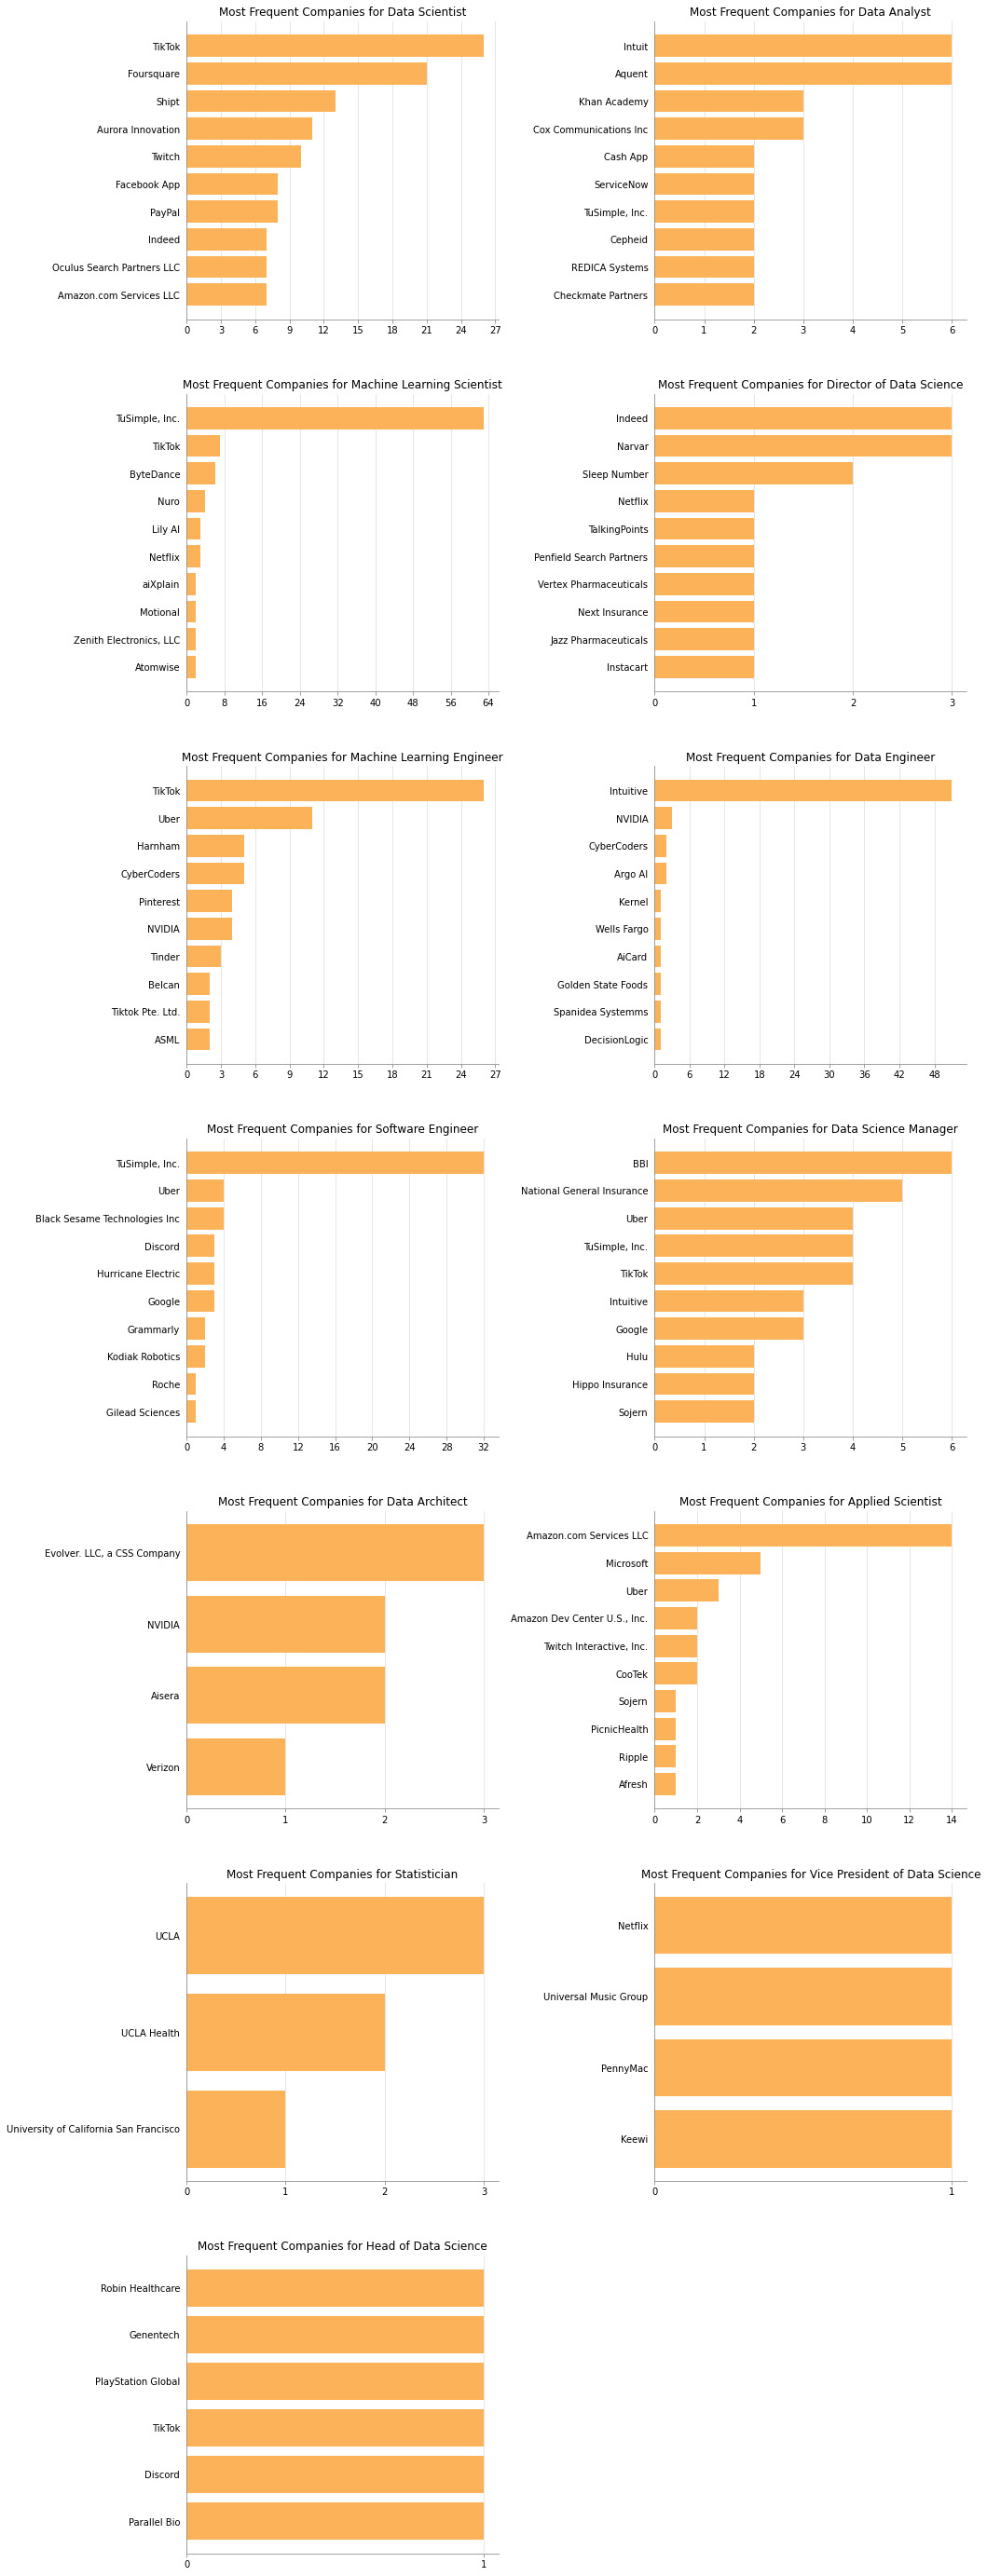

In [25]:
fig, ax = plt.subplots(7,2, figsize=(15,50))
plt.subplots_adjust(hspace = 0.25, wspace = 0.5)


for i in range(len(df_1.Title.unique())):
    
    job_title = df_1.Title.unique()[i]
    
    comp_index = np.flip(df_1[df_1.Title == job_title]['Company'].value_counts().sort_values(ascending=False).index[0:10])
    comp_counts = np.flip(df_1[df_1.Title == job_title]['Company'].value_counts().sort_values(ascending=False).values[0:10])
    
    ax[math.floor(i/2), i%2].barh(y = comp_index,
                                 width = comp_counts,
                                 color = light[2])
    ax[math.floor(i/2), i%2].set_title('Most Frequent Companies for {}'.format(job_title))
    
    ax[math.floor(i/2), i%2].spines["bottom"].set_color(light[0])
    ax[math.floor(i/2), i%2].spines["left"].set_color(light[0])
    ax[math.floor(i/2), i%2].xaxis.label.set_color(dark_bright[0])
    ax[math.floor(i/2), i%2].yaxis.label.set_color(dark_bright[0])
    ax[math.floor(i/2), i%2].title.set_color(dark_bright[0])
    ax[math.floor(i/2), i%2].tick_params(axis ='x', colors = light[0], labelcolor=dark_bright[0])
    ax[math.floor(i/2), i%2].tick_params(axis='y', colors = light[0], labelcolor=dark_bright[0])
    ax[math.floor(i/2), i%2].yaxis.set_ticks_position('none') 
    ax[math.floor(i/2), i%2].xaxis.set_major_locator(MaxNLocator(integer=True))
    ax[math.floor(i/2), i%2].grid(color = grid[0], axis='x')
    ax[math.floor(i/2), i%2].set_axisbelow(True)
    
fig.delaxes(ax[6][1])